#### Importing Libraries 

In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [489]:
data =pd.read_excel(r'C:\Users\hornt\Documents\DS_Alma\03.Datasets\Road Accident Data.xlsx')

In [490]:
print(data.shape)
print(data.columns)
print(data.info())

(307973, 21)
Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail       

### Date time columns

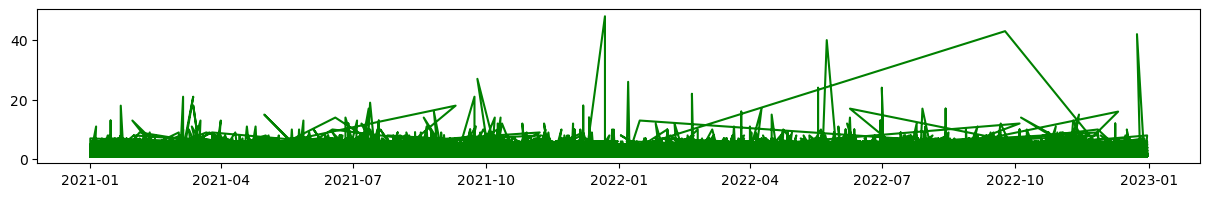

In [491]:
plt.figure(figsize=(15, 2))
plt.plot(data['Accident Date'],data['Number_of_Casualties'],color = 'green')
plt.show()

### Object Columns 

In [492]:
data.select_dtypes(include=['object']).describe()

,Accident_Index,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Road_Type,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,307973,307973,307973,307973,307973,307973,307973,5424,307973,307973,307973,307956,307973,307973,307973
unique,307973,7,7,9,4,5,422,5,51,5,5,1439,2,8,15
top,BS0000001,Friday,Give way or uncontrolled,Not at junction or within 20 metres,Slight,Daylight,Birmingham,Other object on road,Metropolitan Police,Dry,Single carriageway,17:00:00,Urban,Fine no high winds,Car
freq,1,50529,150045,123094,263280,227286,6165,2243,46789,208967,230612,2933,198532,244496,239794


In [517]:
 dd = data['Local_Authority_(District)'].value_counts() 
#dd[dd > (len(data)/422)]
#dd[dd > (0.005*len(data))]
print(len(dd[dd > (0.005*len(data))]))


38


### Numeric Columns 

In [451]:
data.select_dtypes(include=['int','float']).describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


### Dropping Unnecessary columns 

In [452]:
data.drop(['Accident_Index','Latitude','Longitude','Local_Authority_(District)','Police_Force'],axis =1,inplace =True)
data.columns

Index(['Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Carriageway_Hazards',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [453]:
data ['Wind'] = data.loc[:,'Weather_Conditions']

### Exploring Numeric data 

In [454]:
columns =['Number_of_Casualties','Number_of_Vehicles','Speed_limit']
lst =[]
for i in columns:
    threshold = (data[i].mean())  + 2 * (data[i].std())
    outliers_eye_test = data[data[i] > threshold]
    data =data[data[i] < threshold]
    temp = [i,len(outliers_eye_test),outliers_eye_test[i].unique(),len(data)]
    lst.append(temp)
    
print(lst)

[['Number_of_Casualties', 22792, array([11,  3,  4,  5,  6, 10,  8,  7,  9, 13, 12, 14, 16, 18, 15, 19, 21,
       17, 27, 48, 40, 24, 26, 22, 42, 43], dtype=int64), 285181], ['Number_of_Vehicles', 4827, array([ 4,  9,  5,  8,  6,  7, 10, 11, 12], dtype=int64), 280354], ['Speed_limit', 18473, array([70], dtype=int64), 261881]]


In [455]:
pd.DataFrame(lst,columns=['Column','Outlier_count','Outlier_List','Len_Data'])

,Column,Outlier_count,Outlier_List,Len_Data
0,Number_of_Casualties,22792,"[11, 3, 4, 5, 6, 10, 8, 7, 9, 13, 12, 14, 16, ...",285181
1,Number_of_Vehicles,4827,"[4, 9, 5, 8, 6, 7, 10, 11, 12]",280354
2,Speed_limit,18473,[70],261881


<Axes: xlabel='Speed_limit', ylabel='count'>

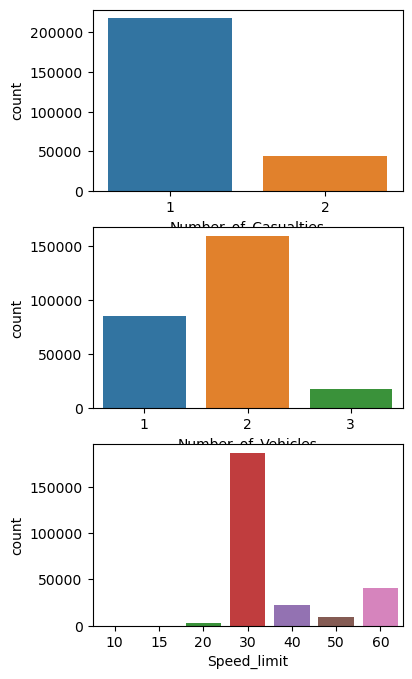

In [456]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(4, 8))
sns.countplot(x= 'Number_of_Casualties',data =data,ax =ax[0])
sns.countplot(x= data['Number_of_Vehicles'],data =data,ax=ax[1])
sns.countplot(x= data['Speed_limit'],data =data,ax=ax[2])

<Axes: xlabel='Speed_limit'>

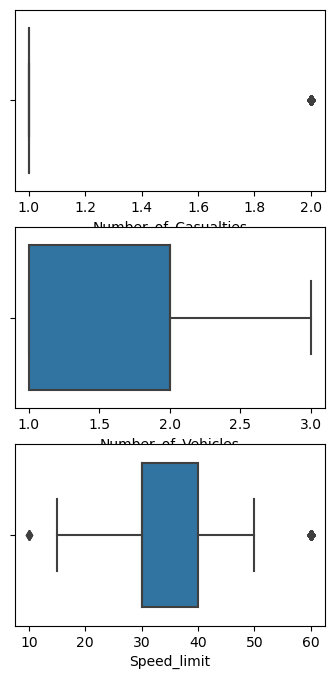

In [457]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(4, 8))
sns.boxplot(x= 'Number_of_Casualties',data =data,ax =ax[0])
sns.boxplot(x= data['Number_of_Vehicles'],data =data,ax=ax[1])
sns.boxplot(x= data['Speed_limit'],data =data,ax=ax[2])

### Exploring date time object 

In [458]:
data['Time_dt'] =pd.to_datetime(data['Time'], format='%H:%M:%S')
data['Time_dt'].dtype

bins = [0, 6, 12,18, 24]
labels = ['Morning', 'Afternoon', 'Evening','Night']
data['Time_bin'] = pd.cut(data['Time_dt'].dt.time.apply(lambda x: x.hour), bins=bins, labels=labels)
#data['Time_bin']
#sns.countplot(x =data['Time_bin'],data =data)

<Axes: xlabel='Month', ylabel='count'>

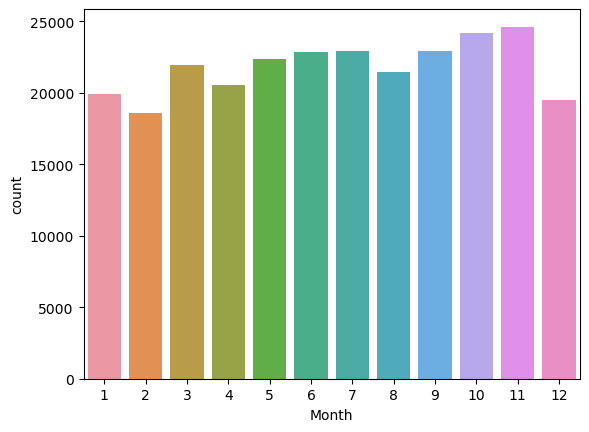

In [461]:
data['Month'] =data['Accident Date'].dt.month
data['Year'] =data['Accident Date'].dt.year
sns.countplot(x =data['Month'],data =data)

In [462]:
data.drop(['Time','Time_dt','Accident Date'],axis=1,inplace=True)

In [463]:
data.columns

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Carriageway_Hazards',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Wind', 'Time_bin', 'Month', 'Year'],
      dtype='object')

### Exploring the object data

In [464]:
unique_count =[]
#for column in list(data.select_dtypes(include=['object']).columns):
for column in list(data.select_dtypes(include=['object']).columns):
    a = [column, len(data[column].unique()),list(data[column].unique())]
    unique_count.append(a)
unique =pd.DataFrame(unique_count,columns =['Column','Unique_Count','Unique_entries'])

## Count of Police_Force = 50; Time:1440; hence select other columns

In [465]:
for i in range(len(unique)):
    print(unique['Column'][i],unique['Unique_entries'][i])

Day_of_Week ['Thursday', 'Sunday', 'Monday', 'Tuesday', 'Friday', 'Wednesday', 'Saturday']
Junction_Control ['Give way or uncontrolled', 'Auto traffic signal', 'Data missing or out of range', 'Authorised person', 'Stop sign', 'Not at junction or within 20 metres', 'Auto traffic sigl']
Junction_Detail ['T or staggered junction', 'Crossroads', 'Not at junction or within 20 metres', 'Roundabout', 'More than 4 arms (not roundabout)', 'Mini-roundabout', 'Private drive or entrance', 'Slip road', 'Other junction']
Accident_Severity ['Serious', 'Slight', 'Fetal', 'Fatal']
Light_Conditions ['Daylight', 'Darkness - lights lit', 'Darkness - lighting unknown', 'Darkness - lights unlit', 'Darkness - no lighting']
Carriageway_Hazards [nan, 'Pedestrian in carriageway - not injured', 'Other object on road', 'Any animal in carriageway (except ridden horse)', 'Previous accident', 'Vehicle load on road']
Road_Surface_Conditions ['Dry', 'Frost or ice', 'Wet or damp', 'Snow', 'Flood over 3cm. deep']
Road_T

In [466]:
data['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       208779
Raining no high winds     31615
Other                      7549
Fog or mist                4097
Snowing no high winds      4029
Raining + high winds       2792
Fine + high winds          2600
Snowing + high winds        420
Name: count, dtype: int64

In [467]:
junc_ctrl_dict = {'Auto traffic sigl':'Auto traffic signal','Data missing or out of range':np.nan}
acc_sev_dict = {'Fetal': 'Fatal'}
road_surf_dict ={'Frost or ice' : 'Frost/Ice', 'Wet or damp' : 'Wet/Damp', 'Flood over 3cm. deep' :'Flood >3cm'}
veh_type_dict ={'Taxi/Private hire car' :'Car', 
                'Van / Goods 3.5 tonnes mgw or under': 'Van', 
               'Goods over 3.5t. and under 7.5t': 'Van',
                'Goods 7.5 tonnes mgw and over' :'Van',
                'Motorcycle over 500cc': 'Motorcycle', 
                'Motorcycle 50cc and under' : 'Motorcycle',
               'Motorcycle 125cc and under': 'Motorcycle',
                'Motorcycle over 125cc and up to 500cc' : 'Motorcycle',
                'Minibus (8 - 16 passenger seats)' : 'Bus',
               'Bus or coach (17 or more pass seats)' : 'Bus'}
light_cdn_dict ={'Darkness - lights lit':'Darkness', 'Darkness - lighting unknown' :'Darkness',
                'Darkness - lights unlit' : 'Darkness', 'Darkness - no lighting' :'Darkness'}

cwh_dict = {'Other object on road':'Other Object','Any animal in carriageway (except ridden horse)':'Animal',
           'Pedestrian in carriageway - not injured':'Pedestrian','Vehicle load on road':'Vehicle'}
weather_dict ={'Fine no high winds':'Fine', 'Raining no high winds':'Rain','Snowing no high winds' :'Snow',
               'Fine + high winds':'Fine','Raining + high winds' :'Rain','Snowing + high winds' :'Snow',
              'Fog or mist':'Fog/Mist'}
wind_dict = {'Fine no high winds':'No_High_Wind', 'Raining no high winds':'No_High_Wind','Snowing no high winds' :'No_High_Wind',
               'Fine + high winds':'High_Wind','Raining + high winds' :'High_Wind','Snowing + high winds' :'High_Wind',
              'Fog or mist':'Other'}



col_to_replace =['Junction_Control','Accident_Severity','Road_Surface_Conditions','Vehicle_Type','Light_Conditions'
                ,'Carriageway_Hazards','Weather_Conditions','Wind']
dict_corres =[junc_ctrl_dict,acc_sev_dict,road_surf_dict,veh_type_dict,light_cdn_dict,cwh_dict,weather_dict,wind_dict]

#replace encoded values
for i in range(0,len(col_to_replace)):
    data[col_to_replace[i]] = data[col_to_replace[i]].replace(dict_corres[i])

In [468]:
data.columns

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Carriageway_Hazards',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Wind', 'Time_bin', 'Month', 'Year'],
      dtype='object')

### For removing outliers in categorical data

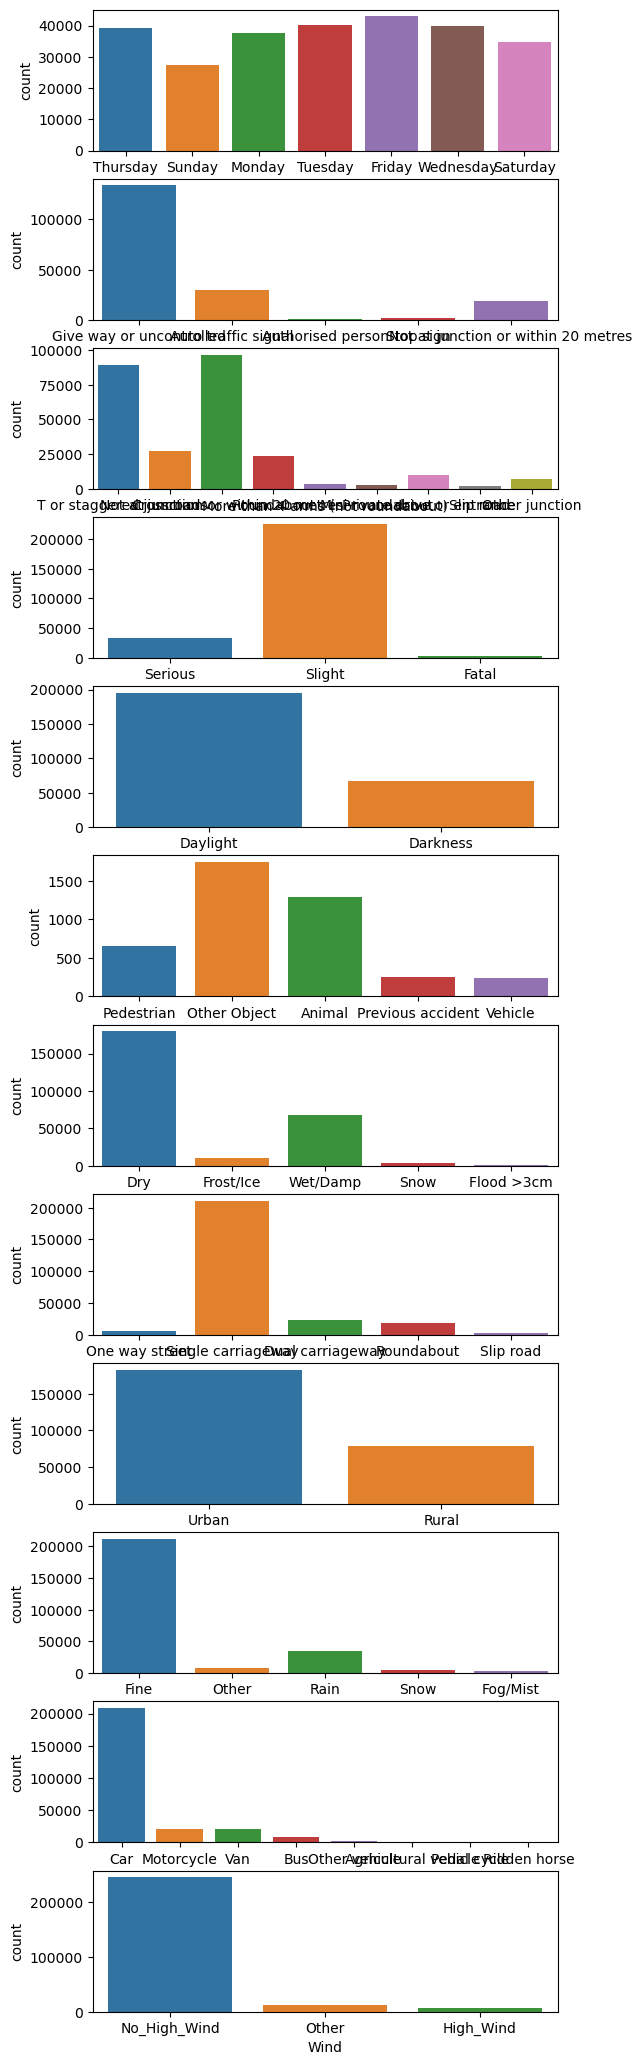

In [469]:
f, ax = plt.subplots(nrows=len(list(unique['Column'])), ncols=1, figsize=(6, 26))

for i in range(len(list(unique['Column']))):
    sns.countplot(x= data[list(unique['Column'])[i]],data =data,ax =ax[i])

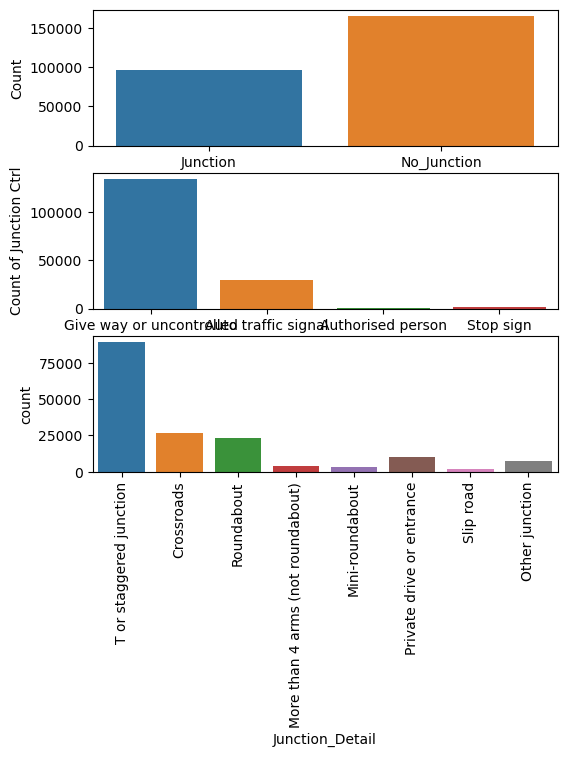

In [470]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))


Nj = len(data[data['Junction_Detail'] != 'Not at junction or within 20 metres'].Junction_Detail)
J = len(data[data['Junction_Detail'] == 'Not at junction or within 20 metres'].Junction_Detail)
Junction_or_not =pd.DataFrame({'Type':['Junction','No_Junction'], 'Count': [J,Nj]},index =[0,1])
Junction_or_not
sns.barplot(Junction_or_not, x = 'Type',y ='Count',ax =ax[0])
## 
#Type	Count
#0	Junction	96570
#1	No_Junction	165311


sns.countplot(x = data[data['Junction_Control'] != 'Not at junction or within 20 metres'].Junction_Control.dropna(),
              data =data,ax =ax[1] )
ax[1].set_ylabel(ylabel = 'Count of Junction Ctrl')

sns.countplot(x = data[data['Junction_Detail'] != 'Not at junction or within 20 metres'].Junction_Detail,data =data,ax=ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.show()

In [471]:
data.columns

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Carriageway_Hazards',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Wind', 'Time_bin', 'Month', 'Year'],
      dtype='object')

### Filtered data after removing outliers 

In [480]:
filtered_data = data[
    (data['Junction_Control'].isin(['Give way or uncontrolled', 'Auto traffic signal'])) &
    (data['Junction_Detail'].isin(['T or staggered junction', 'Crossroads', 'Roundabout'])) &
    (data['Road_Surface_Conditions'].isin(['Dry', 'Wet/Damp'])) &
    (data['Road_Type'].isin(['Single carriageway', 'Dual carriageway', 'Roundabout'])) &
    (data['Weather_Conditions'].isin(['Fine', 'Rain'])) &
    (data['Vehicle_Type'].isin(['Car', 'Van', 'Motorcycle']))
]

# View the filtered DataFrame
print(filtered_data.columns)
print(len(filtered_data))


Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Carriageway_Hazards',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Wind', 'Time_bin', 'Month', 'Year'],
      dtype='object')
119282


In [485]:
filtered_data.describe(include ='object')

,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Carriageway_Hazards,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Wind
count,119282,119282,119282,119282,119282,976,119282,119282,119282,119282,119282,119282
unique,7,2,3,3,2,5,2,3,2,2,3,2
top,Friday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Other Object,Dry,Single carriageway,Urban,Fine,Car,No_High_Wind
freq,19907,96790,75984,104251,90667,448,89613,94401,94817,102799,99205,116974


In [487]:
csv_acc_data =filtered_data.to_excel('acc_data.xlsx',index=False,header =True)

### Heatmaps 

In [347]:
pd.pivot_table(data,values= 'Accident Date',index=['Road_Type'],columns =['Urban_or_Rural_Area'],aggfunc ='count')

Urban_or_Rural_Area,Rural,Urban
Road_Type,,
Dual carriageway,4330,18892
One way street,475,5449
Roundabout,5946,12484
Single carriageway,67483,143749
Slip road,1133,1940
